<a href="https://colab.research.google.com/github/nebojsa-bozanic/OSuM/blob/master/OSuM_Vezba8/OSuM_Vezba8/OSuM_vezba_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>Obrada slike u medicini (BMI)</h1>

Literatura: https://moodle.telekom.ftn.uns.ac.rs/course/view.php?id=82


Laboratorijska vežba 10: Sjedinjavanje multi-modalnih slika

Potrebne biblioteke: cv2, numpy, matplotlib.pyplot, osum

In [1]:
!git clone https://github.com/nebojsa-bozanic/OSuM.git
%cd /content/OSuM/OSuM_Vezba10/OSuM_Vezba10

fatal: destination path 'OSuM' already exists and is not an empty directory.
/content/OSuM/OSuM_Vezba10/OSuM_Vezba10


In [2]:
import cv2
import osum
import matplotlib.pyplot as plt
import numpy as np

from google.colab.patches import cv2_imshow

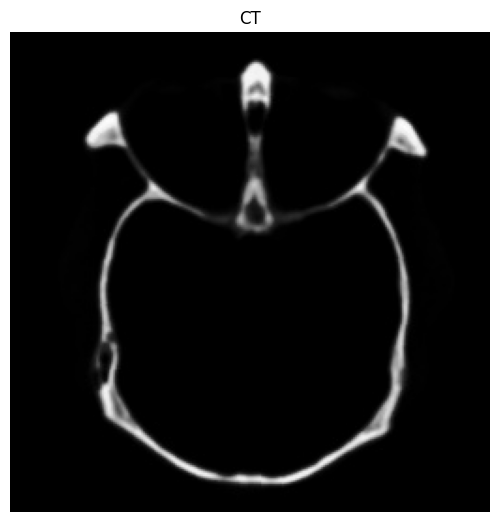

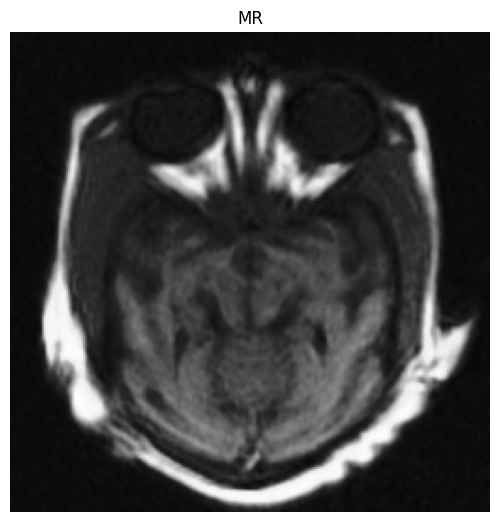

In [3]:
# 1
# 1.1
a = cv2.imread('1_CT.jpg', cv2.IMREAD_GRAYSCALE)
b = cv2.imread('1_MR.jpg', cv2.IMREAD_GRAYSCALE)
osum.disp_im(a, title='CT')
osum.disp_im(b, title='MR')
#plt.show()

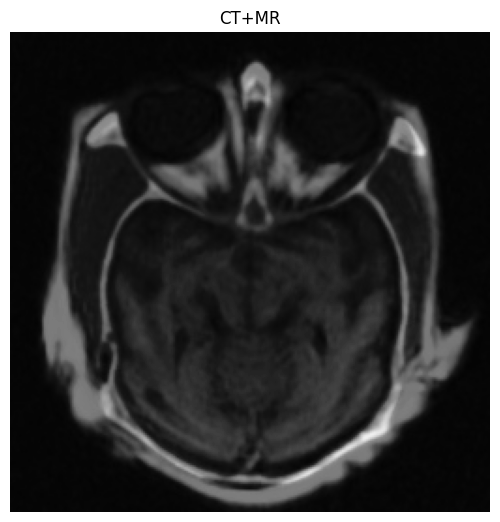

In [4]:
# 1.2
k = 0.5
c = k*a+(1-k)*b
osum.disp_im(c, title='CT+MR')
#plt.show()

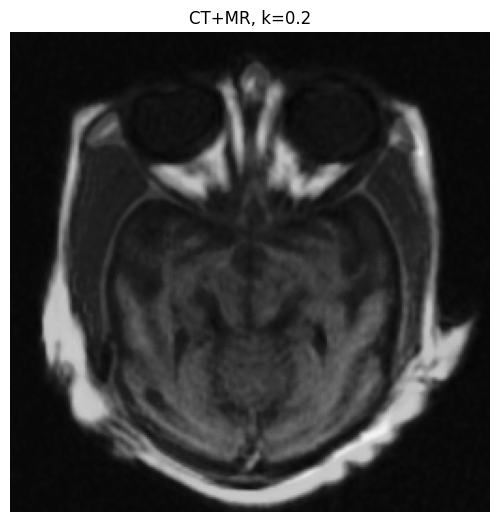

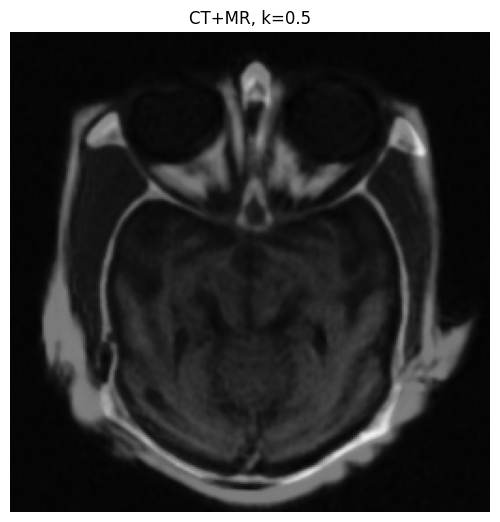

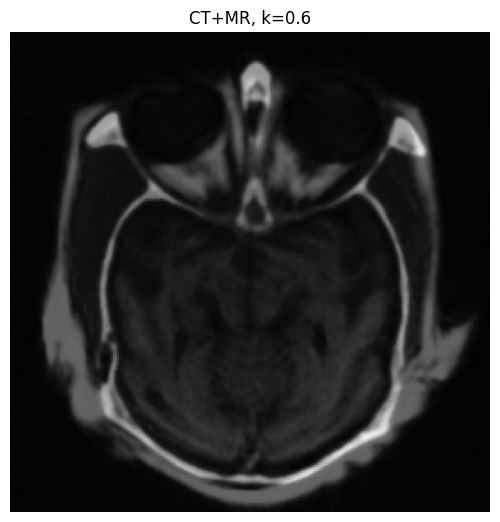

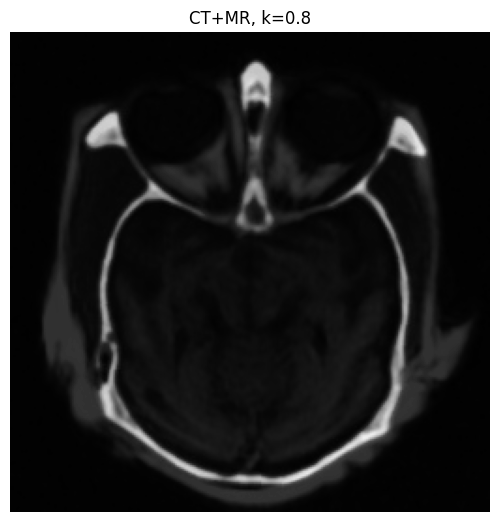

In [5]:
# 1.3
for k in [0.2, 0.5, 0.6, 0.8]:
    c = k*a+(1-k)*b
    osum.disp_im(c, title='CT+MR, k='+str(k))
plt.show()

In [6]:
# 2
# 2.1
LPyrA, GPyrA, ResA, size_vecA = osum.im_pyr_decomp(a, 6)
LPyrB, GPyrB, ResB, size_vecB = osum.im_pyr_decomp(b, 6)

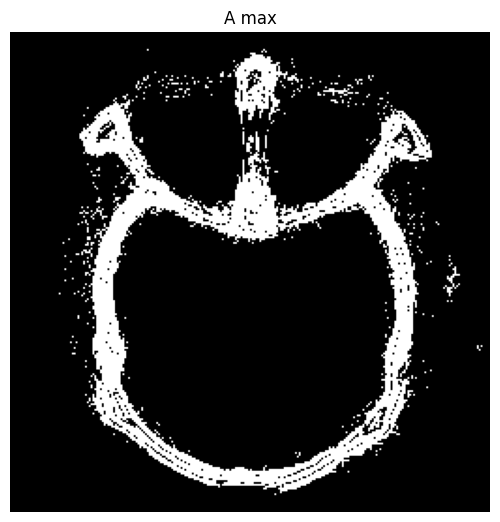

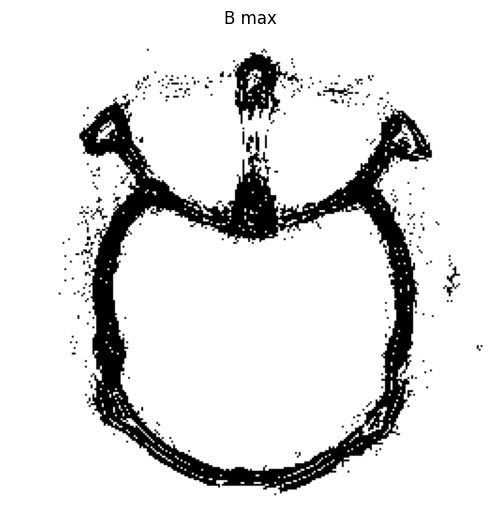

In [7]:
# 2.2
# select abs max
biramA = np.abs(LPyrA[0])>=np.abs(LPyrB[0])
biramB = np.logical_not(biramA)

osum.disp_im(biramA, title='A max', lmin=0, lmax=1)
osum.disp_im(biramB, title='B max', lmin=0, lmax=1)
# plt.show()


In [8]:
# 2.3
LPyrC = LPyrA
for n in range(0, 6):
    biramA = np.abs(LPyrA[n]) >= np.abs(LPyrB[n])
    biramB = np.logical_not(biramA)
    LPyrC[n] = biramA*LPyrA[n] + biramB*LPyrB[n]
    # osum.disp_im(biramA, title='A max, nivo '+str(n+1), lmin=0, lmax=1)
    # osum.disp_im(biramB, title='B max, nivo '+str(n+1), lmin=0, lmax=1)
#plt.show()

In [9]:
# 2.4
ResC = (ResA+ResB)/2

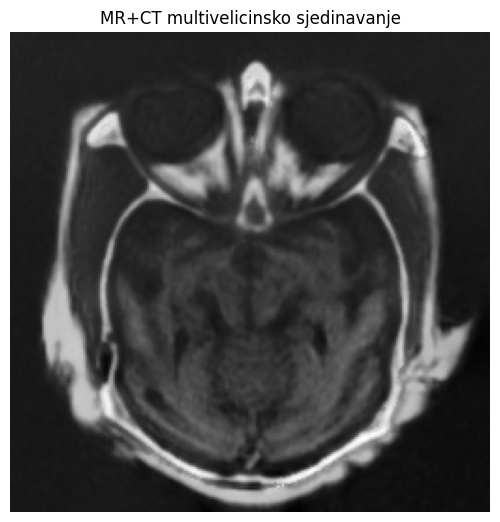

In [10]:
# 2.5
imC = osum.im_pyr_recon(LPyrC, ResC, size_vecA)
osum.disp_im(imC, title='MR+CT multivelicinsko sjedinavanje', lmin=imC.min(), lmax=imC.max())
plt.show()

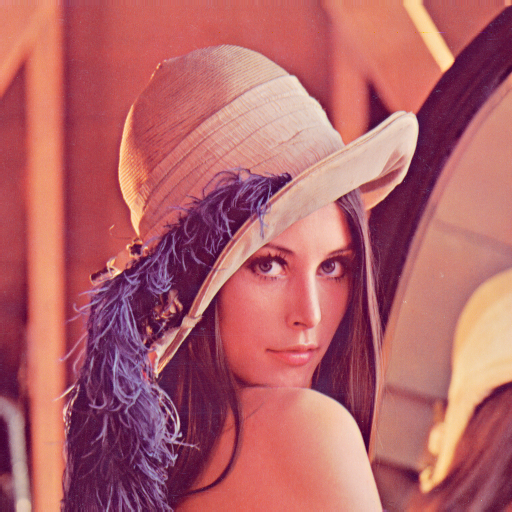

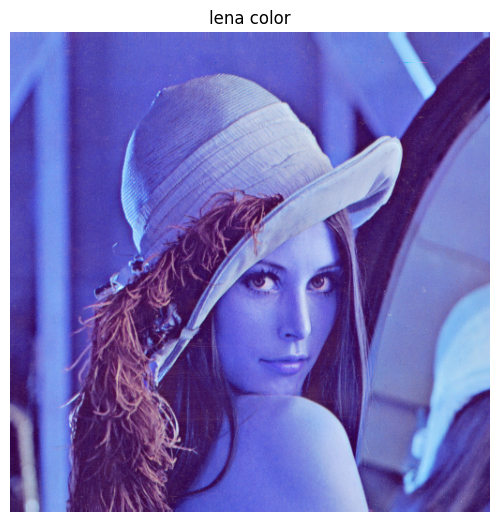

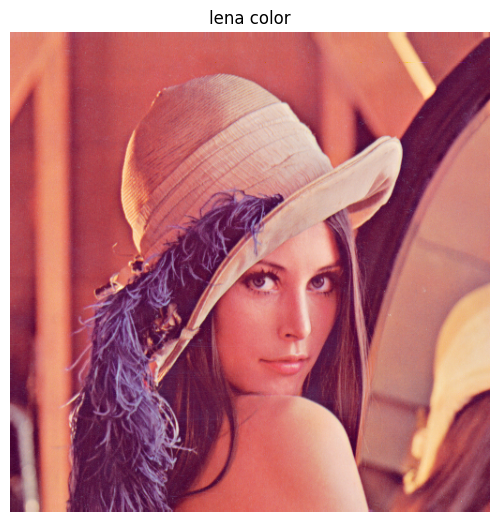

In [14]:
# 3
# 3.1
lena = cv2.imread('lena_color.png')

cv2_imshow(lena)

osum.disp_im(lena, title='lena color')

lena2 = cv2.cvtColor(lena, cv2.COLOR_BGR2RGB)
osum.disp_im(lena2, title='lena color')

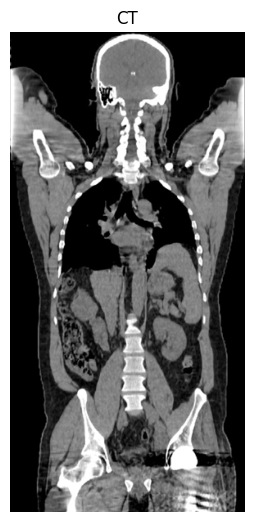

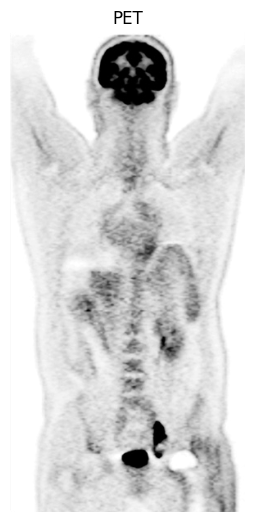

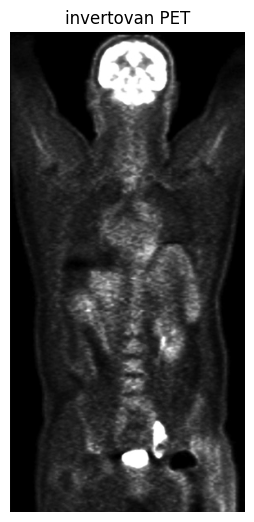

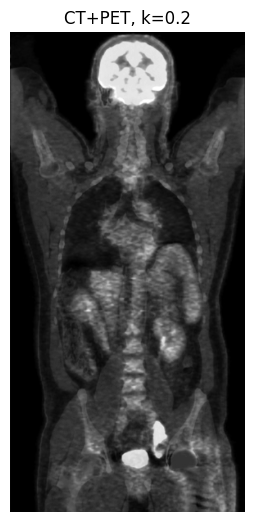

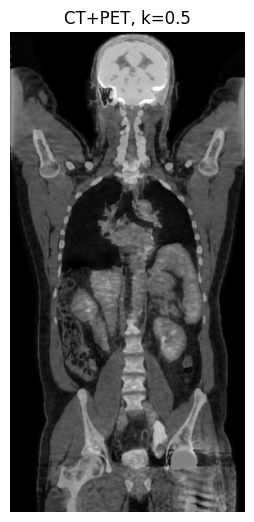

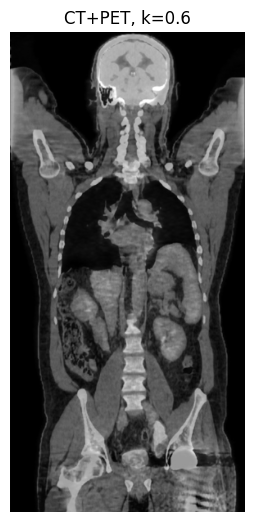

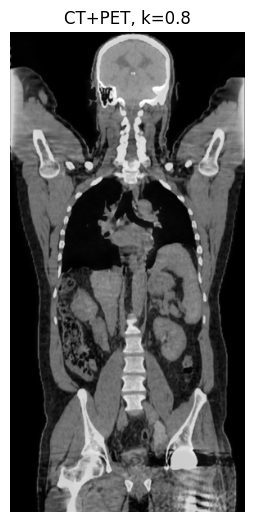

In [15]:
# 3.2
a1 = cv2.imread('2_CT.png', cv2.IMREAD_GRAYSCALE)
b1 = cv2.imread('2_PET.png', cv2.IMREAD_GRAYSCALE)
osum.disp_im(a1, title='CT')
osum.disp_im(b1, title='PET')
b1 = 255-b1
osum.disp_im(b1, title='invertovan PET')
#plt.show()

for k in [0.2, 0.5, 0.6, 0.8]:
    c1 = k*a1+(1-k)*b1
    osum.disp_im(c1, title='CT+PET, k='+str(k))

In [16]:
# 3.3
a1_c = cv2.imread('2_CT.png', cv2.IMREAD_COLOR)
b1 = cv2.imread('2_PET.png', cv2.IMREAD_GRAYSCALE)
b1 = 255-b1
b1_c = cv2.applyColorMap(b1, cv2.COLORMAP_JET)
# b1_c = cv2.applyColorMap(b1, cv2.COLORMAP_PARULA)
# b1_c = cv2.applyColorMap(b1, cv2.COLORMAP_HOT)
# b1_c = cv2.applyColorMap(b1, cv2.COLORMAP_COOL)
b1_c = cv2.cvtColor(b1_c, cv2.COLOR_BGR2RGB)

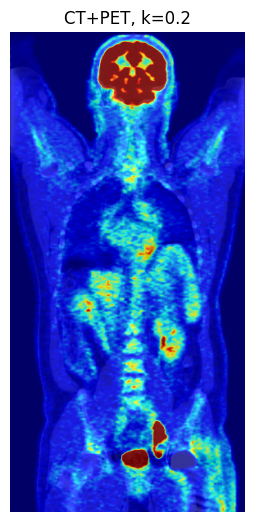

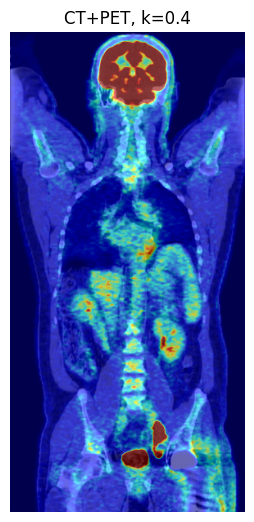

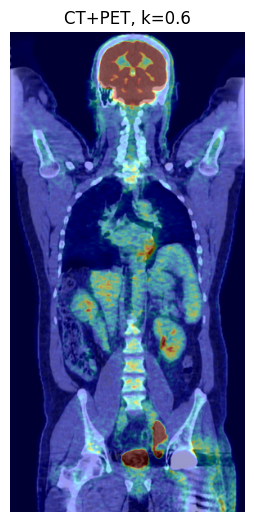

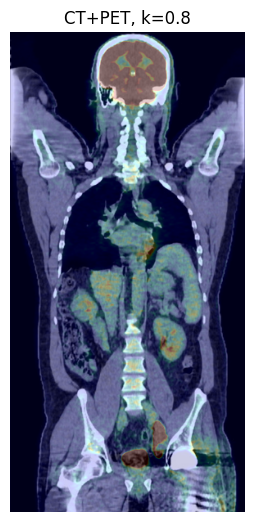

In [17]:
# 3.4
for k in [0.2, 0.4, 0.6, 0.8]:
    c2 = np.uint8(k*a1_c+(1-k)*b1_c)
    osum.disp_im(c2, title='CT+PET, k='+str(k))
plt.show()

In [18]:
# 4
# 4.1
L = cv2.imread('2_CT.png', cv2.IMREAD_GRAYSCALE)
a = cv2.imread('2_PET.png', cv2.IMREAD_GRAYSCALE)
b = np.zeros(a.shape)
# b = np.zeros(a.shape)+100

In [20]:
# 4.2
im = np.zeros((a.shape[0], a.shape[1], 3), dtype=np.uint8)
im[:,:,0] = L
im[:,:,1] = 255-a # invertovanje zbog PET
im[:,:,2] = b

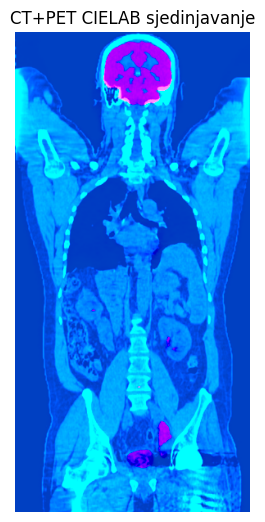

In [21]:
# 4.3
im_c = cv2.cvtColor(im, cv2.COLOR_LAB2RGB)
osum.disp_im(im_c, lmin=im_c.min(), lmax=im_c.max(), title='CT+PET CIELAB sjedinjavanje')
plt.show()